## Nagpur AirQuality Analysis for year 2020 
#### <p style="text-align:right"> - By Akshay Dharmik & Gaurav Kantrod </p>

### Importing all the required libraries

In [110]:
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sp
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

### Reading CSV file as dataframe

In [111]:
aq = pd.read_csv('nagpur.csv')

### Having a look at data points and features

In [112]:
aq.head()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,"Opp GPO Civil Lines, Nagpur - MPCB",Nagpur,IN,2020-12-24T17:45:00Z,2020-12-24T23:15:00+05:30,pm25,130.54,µg/m³,21.152875,79.051753,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
1,"Opp GPO Civil Lines, Nagpur - MPCB",Nagpur,IN,2020-12-24T17:15:00Z,2020-12-24T22:45:00+05:30,pm25,103.87,µg/m³,21.152875,79.051753,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
2,"Opp GPO Civil Lines, Nagpur - MPCB",Nagpur,IN,2020-12-24T16:45:00Z,2020-12-24T22:15:00+05:30,pm25,103.87,µg/m³,21.152875,79.051753,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
3,"Opp GPO Civil Lines, Nagpur - MPCB",Nagpur,IN,2020-12-24T15:15:00Z,2020-12-24T20:45:00+05:30,pm25,86.84,µg/m³,21.152875,79.051753,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
4,"Opp GPO Civil Lines, Nagpur - MPCB",Nagpur,IN,2020-12-24T13:00:00Z,2020-12-24T18:30:00+05:30,pm25,57.82,µg/m³,21.152875,79.051753,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."


In [113]:
aq.tail()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
12223,"Opp GPO Civil Lines, Nagpur - MPCB",Nagpur,IN,2020-01-01T01:00:00Z,2020-01-01T06:30:00+05:30,pm25,28.17,µg/m³,21.152875,79.051753,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
12224,"Opp GPO Civil Lines, Nagpur - MPCB",Nagpur,IN,2020-01-01T00:45:00Z,2020-01-01T06:15:00+05:30,pm25,28.17,µg/m³,21.152875,79.051753,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
12225,"Opp GPO Civil Lines, Nagpur - MPCB",Nagpur,IN,2020-01-01T00:30:00Z,2020-01-01T06:00:00+05:30,pm25,28.17,µg/m³,21.152875,79.051753,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
12226,"Opp GPO Civil Lines, Nagpur - MPCB",Nagpur,IN,2020-01-01T00:15:00Z,2020-01-01T05:45:00+05:30,pm25,0.00,µg/m³,21.152875,79.051753,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
12227,"Opp GPO Civil Lines, Nagpur - MPCB",Nagpur,IN,2020-01-01T00:00:00Z,2020-01-01T05:30:00+05:30,pm25,28.64,µg/m³,21.152875,79.051753,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."


### Checking for null values

In [114]:
aq.isnull().sum()

location       0
city           0
country        0
utc            0
local          0
parameter      0
value          0
unit           0
latitude       0
longitude      0
attribution    0
dtype: int64

### Data types

In [115]:
aq.dtypes

location        object
city            object
country         object
utc             object
local           object
parameter       object
value          float64
unit            object
latitude       float64
longitude      float64
attribution     object
dtype: object

### Total number of observations

In [21]:
aq.shape

(12228, 11)

### All columns in data

In [22]:
aq.columns

Index(['location', 'city', 'country', 'utc', 'local', 'parameter', 'value',
       'unit', 'latitude', 'longitude', 'attribution'],
      dtype='object')

### Segregating the data wrt to pm2.5 parameter, unit is µg/m³, considering only local timestamp and pm25 value

In [23]:
pm25_df = aq[['local','value']][aq['parameter'] == 'pm25']
pm25_df.head()

,local,value
0,2020-12-24T23:15:00+05:30,130.54
1,2020-12-24T22:45:00+05:30,103.87
2,2020-12-24T22:15:00+05:30,103.87
3,2020-12-24T20:45:00+05:30,86.84
4,2020-12-24T18:30:00+05:30,57.82


### Defining functions to extract day, month, year and time

In [24]:
pm25_df['year'] = list(map(lambda x:x[0:4], pm25_df['local']))

In [25]:
pm25_df['month'] = list(map(lambda x:x[5:7], pm25_df['local']))

In [26]:
pm25_df['date'] = list(map(lambda x:x[8:10], pm25_df['local']))

In [27]:
pm25_df['time'] = list(map(lambda x:x[11:16], pm25_df['local']))

In [28]:
pm25_df.head()

,local,value,year,month,date,time
0,2020-12-24T23:15:00+05:30,130.54,2020,12,24,23:15
1,2020-12-24T22:45:00+05:30,103.87,2020,12,24,22:45
2,2020-12-24T22:15:00+05:30,103.87,2020,12,24,22:15
3,2020-12-24T20:45:00+05:30,86.84,2020,12,24,20:45
4,2020-12-24T18:30:00+05:30,57.82,2020,12,24,18:30


In [29]:
pm25_df.drop(columns = ['local'], axis = 1, inplace=True)

In [30]:
pm25_df.head()

,value,year,month,date,time
0,130.54,2020,12,24,23:15
1,103.87,2020,12,24,22:45
2,103.87,2020,12,24,22:15
3,86.84,2020,12,24,20:45
4,57.82,2020,12,24,18:30


In [31]:
pm25_df.tail()

,value,year,month,date,time
12223,28.17,2020,01,01,06:30
12224,28.17,2020,01,01,06:15
12225,28.17,2020,01,01,06:00
12226,0.00,2020,01,01,05:45
12227,28.64,2020,01,01,05:30


In [32]:
pm25_df.shape

(12228, 5)

In [33]:
pm25_df['month'].unique()

array(['12', '11', '10', '09', '08', '07', '06', '05', '04', '03', '02',
       '01'], dtype=object)

### Pivot table

In [34]:
pivot_pm_25 = pd.pivot_table(pm25_df, values='value', index='date', columns='month', fill_value=0 )
pivot_pm_25

month,01,02,03,04,05,06,07,08,09,10,11,12
date,,,,,,,,,,,,
01,28.601905,28.297222,37.770500,16.473412,34.242045,11.458333,17.740909,0.000000,0.000000,29.723571,72.083333,40.814000
02,29.340241,17.312857,28.196173,22.605747,36.230000,9.818125,16.808286,0.000000,0.000000,28.300526,84.994687,47.117778
03,48.465065,470.869388,39.747885,24.066452,33.883947,9.568387,13.618421,0.000000,0.000000,35.232000,79.502778,72.895000
04,55.353333,50.289765,24.946471,26.596848,20.914324,8.788400,19.585517,1.010000,38.790000,30.160000,67.090000,43.312000
05,31.168780,46.664054,33.637500,16.441739,25.959286,4.730000,8.705172,19.300000,0.000000,26.835556,51.220000,48.043846
06,28.489324,38.390506,26.040115,25.303333,0.000000,35.935714,0.000000,10.470179,31.530000,38.827692,56.808947,70.170909
07,48.334886,37.362907,42.956477,25.804918,18.473750,20.820000,14.795000,18.195652,9.800000,38.977619,52.919231,67.509000
08,45.821613,35.732889,23.419063,18.447778,22.956333,21.357949,0.000000,36.463333,0.000000,31.468000,81.587500,63.482857
09,38.838272,29.580909,0.000000,24.895385,19.729643,19.476098,0.000000,12.440000,62.420000,33.785000,76.456471,55.288333


### Month wise data 

In [35]:
pm25_df4month=pm25_df[["value","month","date"]]

In [36]:
#January
dffor01=pm25_df4month[pm25_df4month["month"]=="01"][["value","date"]]
finaldf01=dffor01.groupby("date")[["value"]].mean()

#Febrruary
dffor02=pm25_df4month[pm25_df4month["month"]=="02"][["value","date"]]
finaldf02=dffor02.groupby("date")[["value"]].mean()

#March
dffor03=pm25_df4month[pm25_df4month["month"]=="03"][["value","date"]]
finaldf03=dffor03.groupby("date")[["value"]].mean()

#April
dffor04=pm25_df4month[pm25_df4month["month"]=="04"][["value","date"]]
finaldf04=dffor04.groupby("date")[["value"]].mean()

#May
dffor05=pm25_df4month[pm25_df4month["month"]=="05"][["value","date"]]
finaldf05=dffor05.groupby("date")[["value"]].mean()

#June
dffor06=pm25_df4month[pm25_df4month["month"]=="06"][["value","date"]]
finaldf06=dffor06.groupby("date")[["value"]].mean()

#July
dffor07=pm25_df4month[pm25_df4month["month"]=="07"][["value","date"]]
finaldf07=dffor07.groupby("date")[["value"]].mean()

#August
dffor08=pm25_df4month[pm25_df4month["month"]=="08"][["value","date"]]
finaldf08=dffor08.groupby("date")[["value"]].mean()

#September
dffor09=pm25_df4month[pm25_df4month["month"]=="09"][["value","date"]]
finaldf09=dffor09.groupby("date")[["value"]].mean()

#octomber
dffor10=pm25_df4month[pm25_df4month["month"]=="10"][["value","date"]]
finaldf10=dffor10.groupby("date")[["value"]].mean()

#november
dffor11=pm25_df4month[pm25_df4month["month"]=="11"][["value","date"]]
finaldf11=dffor11.groupby("date")[["value"]].mean()

#December
dffor12=pm25_df4month[pm25_df4month["month"]=="12"][["value","date"]]
finaldf12=dffor12.groupby("date")[["value"]].mean()


### Mean values before removing outliers

In [37]:
# pm25_df

In [38]:
gp2=pm25_df.groupby(['month'])['value'].mean()
gp2

month
01    101.417090
02     47.302598
03     25.442877
04     22.389369
05     22.852285
06     15.814049
07     16.143669
08     12.567308
09     24.218671
10     38.765106
11     61.368170
12     61.460870
Name: value, dtype: float64

In [39]:
l1=list(np.round(gp2.values,2))

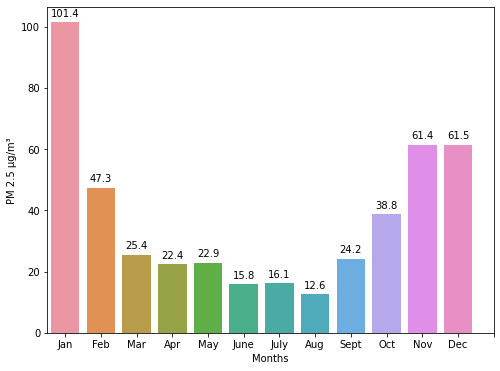

In [40]:
plt.figure(figsize=(8, 6))
g=sns.barplot('month', 'value', data=pm25_df,ci=None)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')  
plt.ylabel("PM 2.5 µg/m³")
plt.xlabel("Months")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","June","July","Aug","Sept","Oct","Nov","Dec"])
plt.show()

### Outliers in data readings

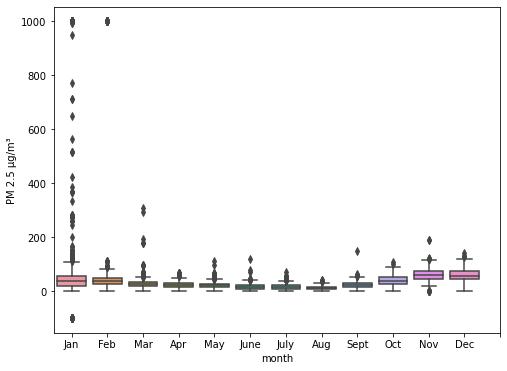

In [41]:
plt.figure(figsize=(8, 6))
pm25_df4month2=pm25_df4month
pm25_df4month2["month"].astype(int)
pm25_df4month2["value"].astype(int)
pm25_df4month2
sns.boxplot(x="month",y="value", data=pm25_df4month2)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","June","July","Aug","Sept","Oct","Nov","Dec"])
plt.ylabel("PM 2.5 µg/m³")
plt.show()

### Removing outliers from data

In [42]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [43]:
# values after removing outliers
janvalues=list(remove_outlier(finaldf01,"value")["value"])
febvalues=list(remove_outlier(finaldf02,"value")["value"])
marvalues=list(remove_outlier(finaldf03,"value")["value"])
aprvalues=list(remove_outlier(finaldf04,"value")["value"])
mayvalues=list(remove_outlier(finaldf05,"value")["value"])
junevalues=list(remove_outlier(finaldf06,"value")["value"])
julyvalues=list(remove_outlier(finaldf07,"value")["value"])
augvalues=list(remove_outlier(finaldf08,"value")["value"])
septvalues=list(remove_outlier(finaldf09,"value")["value"])
octvalues=list(remove_outlier(finaldf10,"value")["value"])
novvalues=list(remove_outlier(finaldf11,"value")["value"])
decvalues=list(remove_outlier(finaldf12,"value")["value"])

### Means after removing outliers

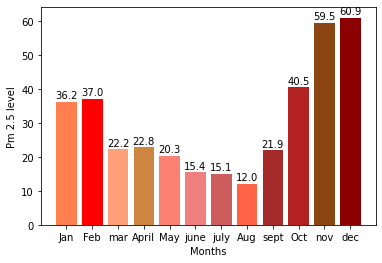

In [44]:
from matplotlib import cm
means2=[np.mean(janvalues),np.mean(febvalues),np.mean(marvalues),np.mean(aprvalues),np.mean(mayvalues),
       np.mean(junevalues),np.mean(julyvalues),np.mean(augvalues),np.mean(septvalues),np.mean(octvalues),np.mean(novvalues)
       ,np.mean(decvalues)]
colors=["coral","red","lightsalmon","peru","salmon","lightcoral","indianred","tomato","brown","firebrick","saddlebrown","darkred"]
months2=["Jan","Feb","mar","April","May","june","july","Aug","sept","Oct","nov","dec"]

plt.bar(months2,means2,color=colors)

for x, y in zip(months2, means2):
    plt.text(x,y+1, str(round(y,1)),ha="center")
plt.xlabel("Months")
plt.ylabel("Pm 2.5 level")
plt.show()

## Hypothesis 1

Null Hypothesis -- there is no difference in pollution level due to lockdown in the city <br>
Alternate Hypothesis -- there is a significant decrease in pollution level after lockdown in the city <br>
considering left tailed test as we are just interested in determining whether there is decrease or not at a 0.05 % confidence level

In [45]:
jan_feb_mar=janvalues+febvalues+marvalues
mu1=np.mean(jan_feb_mar)
var1=np.var(jan_feb_mar)
n1=len(jan_feb_mar)

apr_may_june=aprvalues+mayvalues+junevalues
mu2=np.mean(apr_may_june)
var2=np.var(apr_may_june)
n2=len(apr_may_june)

print("n1 =",n1,"n2 =",n2)
print("Mu1 = ",mu1,"mu2 = ",mu2)
print("var1 = ",var1,"var2 = ",var2)

n1 = 70 n2 = 83
Mu1 =  32.07224896248275 mu2 =  19.422683922687497
var1 =  118.59001070567068 var2 =  31.262330069773654


#### z statistic value for Hypothesis testing of Jan-Feb-Mar and April-May-June

In [46]:
z=(mu2-mu1)/np.sqrt((var1/n1)+(var2/n2))
z

-8.790362135614936

In [47]:
#critical value at alpha = 0.05
sp.norm.ppf(0.05)

-1.6448536269514729

#### Here Z statistic calculated (-8.79) is < -1.164 so we can reject the null hypothesis that there is no change in pollution and accept the alternate hypothesis that there is significant level of decrease in the pollution

#### Conclusion - we are 95 % confident that there is decrease in pollution level after lockdown started in the month of march

###  Hypothesis 2

Null Hypothesis -- there is no difference in pollution level in the city due to lift of lockdown and relaxation in guidelines of covid <br>
Alternate Hypothesis -- there is a significant increase in pollution level after lift of lockdown (unlockdown phase 4) in the month of September in the city <br>
considering right tailed test as we are just interested in deterining wether there is increase or not at a 0.05 % confidence level 

In [48]:
mu1=np.mean(augvalues)
mu2=np.mean(septvalues)
var1=np.var(septvalues)
var2=np.var(augvalues)
n1=len(augvalues)
n2=len(septvalues)
print("n1 = ", len(augvalues))
print("n2 = ", len(septvalues))
print("mu1 ",mu1)
print("mu2 ",mu2)
print("var1 ",var1 )
print("var2 ",var2 )

n1 =  16
n2 =  24
mu1  11.98917692158385
mu2  21.889765086996338
var1  87.63811701090395
var2  34.62232190035462


In [49]:
t=(mu2-mu1)/np.sqrt((var1/n1)+(var2/n2))
t

3.763644591910508

As n1 and n2 is less than 30 we will use Effective dof for T test <br>
Effective Degree of freedom is given by

In [50]:
numerator = ( ( (var1) / n1 ) + ( (var2) / n2 ) )**2
denominator = ( ( (var1/n1)**2 )/(n1-1)  ) + ( ( (var2/n2)**2 )/(n2-1)  )
Edof = numerator/denominator
Edof
# now T(0.95,23)

22.905477723678136

In [51]:
t=sp.t.ppf(0.95,23)
t

1.7138715277470473

#### Here T statistic calculated ( 3.76 ) > T critical (1.713 ) so we can reject the null hypothesis that there is no significant increase in pollution level and accept alternate hypothesis that there is significant increse in pollution level after unlockdown phase 4

#### Conclusion - we are 95% confident that pollution level in the city increased after unlockdown phase  4 , which started in month of september 

### Dividing March month data into 4 weeks

In [52]:
march_df = pm25_df[pm25_df['month'] == '03'][['value','date']]
march_df

,value,date
6307,23.89,31
6308,23.24,31
6309,23.24,31
6310,23.24,31
6311,24.10,31
...,...,...
8026,62.64,01
8027,64.18,01
8028,64.18,01
8029,64.18,01


### Segregating data into 4 weeks of march

In [53]:
march_first_week = march_df[(march_df['date'] >= '01') & (march_df['date'] <= '07')]['value']
march_second_week = march_df[(march_df['date'] >= '08') & (march_df['date'] <= '14')]['value']
march_third_week = march_df[(march_df['date'] >= '15') & (march_df['date'] <= '21')]['value']
march_fourth_week = march_df[march_df['date'] >= '22']['value']
march_first_week

7531    33.24
7532    34.08
7533    34.08
7534    35.69
7535    35.92
        ...  
8026    62.64
8027    64.18
8028    64.18
8029    64.18
8030    59.52
Name: value, Length: 500, dtype: float64

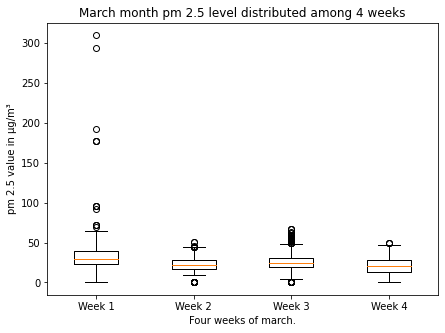

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
plt.boxplot([march_first_week, march_second_week, march_third_week, march_fourth_week])
plt.ylabel("pm 2.5 value in µg/m³")
plt.xlabel("Four weeks of march.")
plt.xticks([1,2,3,4], ['Week 1', 'Week 2', 'Week 3', 'Week 4'])
plt.title("March month pm 2.5 level distributed among 4 weeks")
plt.show()

In [59]:
total_number_of_observations = len(march_first_week) + len(march_second_week) + len(march_third_week) +\
len(march_fourth_week)
print(total_number_of_observations)

1724


### Remove Outliers from 4 march weeks data

In [60]:
weeks = [march_first_week, march_second_week, march_third_week, march_fourth_week]
outliers_removed_data = []
def removeOutliers(weeks):
    data = []
    for week in weeks:
        new_data = []
        Q1 = np.quantile(week, 0.25)
        Q3 = np.quantile(week, 0.75)
        IQR = Q3 - Q1
        UL = Q3 + 1.5*IQR
        LL = Q1 - 1.5*IQR
        if LL < 0:
            LL = 0
        else:
            LL = LL
        
        new_data = week[(week > LL) & (week < UL)]
        sortedData = new_data.values
        
        data.append(sorted(sortedData))
        
    return data
        
    

outliers_removed_data = removeOutliers(weeks)

### Box plot after removing outliers

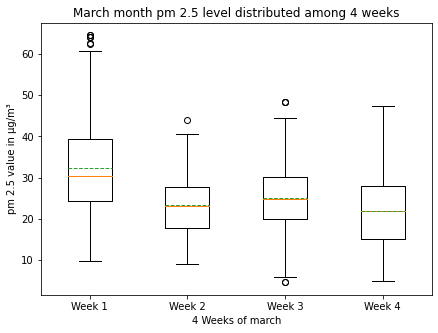

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
plt.boxplot([outliers_removed_data[0], outliers_removed_data[1], outliers_removed_data[2], outliers_removed_data[3]],
           showmeans=True, meanline=True)
plt.xlabel("4 Weeks of march")
plt.ylabel("pm 2.5 value in µg/m³")
plt.title("March month pm 2.5 level distributed among 4 weeks")
plt.xticks([1,2,3,4], ['Week 1', 'Week 2', 'Week 3', 'Week 4'])
plt.show()

### To take middle 100 values from each group

In [62]:
def takeMiddle100Values(data):
    new_points = []
    length = len(data)
    start = length//2 - 50
    end = length//2 + 50
    
    for index in range(start, end):
        new_points.append(data[index])
        
        
    return new_points    

In [63]:
middle_values = []
for week_data in outliers_removed_data:
    middle_values.append(takeMiddle100Values(week_data))

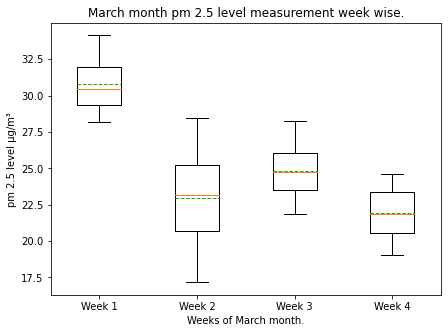

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
plt.boxplot([middle_values[0], middle_values[1], middle_values[2], middle_values[3]],showmeans=True, meanline=True)
plt.xlabel("Weeks of March month.")
plt.ylabel("pm 2.5 level µg/m³")
plt.title("March month pm 2.5 level measurement week wise.")
plt.xticks([1,2,3,4],['Week 1', 'Week 2', 'Week 3', 'Week 4'])
plt.show()

In [65]:
march_outliers_removed_df = pd.DataFrame()
march_outliers_removed_df['march_first_week'] = middle_values[0]
march_outliers_removed_df['march_second_week'] = middle_values[1]
march_outliers_removed_df['march_third_week'] = middle_values[2]
march_outliers_removed_df['march_fourth_week'] = middle_values[3]

In [67]:
total_observations = march_outliers_removed_df.shape[0] * march_outliers_removed_df.shape[1]

### Anova test on the 4 weeks of March to check whether pollution level for all 4 weeks is same or not

#### H0: Means of all four weaks are same 
#### H1: Atleast one mean is different

In [154]:
f_statistic, pvalue = sp.f_oneway(march_outliers_removed_df['march_first_week'], 
                                  march_outliers_removed_df['march_second_week'],
                                  march_outliers_removed_df['march_third_week'], 
                                  march_outliers_removed_df['march_fourth_week'])
print(f"F statistic is {f_statistic} and p-value is {pvalue}")

F statistic is 322.541019473694 and p-value is 6.334740500831575e-106


In [155]:
f_critical = sp.f.ppf(0.95, (4-1), (total_observations - 4))
print(f_critical)

2.6274407695704896


#### As f_critical < f_observed we reject H0

#### As we accept H1, we need to perform Tuckey's test to know which all means are different

### Tuckey's Test to find which all weeks are different

In [156]:
stacked_df = march_outliers_removed_df.stack().reset_index()
stacked_df.head()

,level_0,level_1,0
0,0,march_first_week,28.19
1,0,march_second_week,17.16
2,0,march_third_week,21.85
3,0,march_fourth_week,19.05
4,1,march_first_week,28.21


In [157]:
stacked_data = stacked_df.rename(columns={'level_0': 'id','level_1': 'week',0:'pm25'})
stacked_data.head()

,id,week,pm25
0,0,march_first_week,28.19
1,0,march_second_week,17.16
2,0,march_third_week,21.85
3,0,march_fourth_week,19.05
4,1,march_first_week,28.21


In [158]:
MultiComp = MultiComparison(stacked_data['pm25'], stacked_data['week'])

In [159]:
MultiComp.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
march_first_week,march_fourth_week,-8.8518,0.001,-9.656,-8.0476,True
march_first_week,march_second_week,-7.8241,0.001,-8.6283,-7.0199,True
march_first_week,march_third_week,-5.9684,0.001,-6.7726,-5.1642,True
march_fourth_week,march_second_week,1.0277,0.0058,0.2235,1.8319,True
march_fourth_week,march_third_week,2.8834,0.001,2.0792,3.6876,True
march_second_week,march_third_week,1.8557,0.001,1.0515,2.6599,True


In [160]:
print(pairwise_tukeyhsd(stacked_data['pm25'], stacked_data['week'], alpha=0.05))

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
 march_first_week march_fourth_week  -8.8518  0.001  -9.656 -8.0476   True
 march_first_week march_second_week  -7.8241  0.001 -8.6283 -7.0199   True
 march_first_week  march_third_week  -5.9684  0.001 -6.7726 -5.1642   True
march_fourth_week march_second_week   1.0277 0.0058  0.2235  1.8319   True
march_fourth_week  march_third_week   2.8834  0.001  2.0792  3.6876   True
march_second_week  march_third_week   1.8557  0.001  1.0515  2.6599   True
--------------------------------------------------------------------------


#### Conslusion -- we are 95% confident  that  pollution levels for all 4 week are different from each other.

### Is their difference in Day(6 AM to 6 PM) and night pm2.5 (6 PM to 6 AM) for month of november ?

In [69]:
nov_df = pm25_df[pm25_df['month'] == '11'][['value', 'time']]
print(nov_df)

      value   time
184  100.27  23:15
185   78.12  21:15
186   75.27  20:45
187   41.76  13:45
188   53.39  12:45
..      ...    ...
567   61.19  14:15
568   61.19  13:45
569   65.17  12:30
570   68.31  11:45
571    0.00  11:15

[388 rows x 2 columns]


In [70]:
nov_df['hours'] = list(map(lambda x:int(x[0:2]), nov_df['time']))

In [71]:
nov_df.drop(columns = ['time'], inplace=True, axis = 1)
nov_df

,value,hours
184,100.27,23
185,78.12,21
186,75.27,20
187,41.76,13
188,53.39,12
...,...,...
567,61.19,14
568,61.19,13
569,65.17,12
570,68.31,11


In [72]:
nov_df['hours'].unique()

array([23, 21, 20, 13, 12,  5,  3,  2, 19, 18, 15, 14,  7,  6,  4,  1, 22,
        8, 10, 16,  9, 17, 11,  0], dtype=int64)

In [73]:
day = nov_df[(nov_df['hours'] >= 6) & (nov_df['hours'] <= 18)]['value']
night = nov_df[(nov_df['hours'] > 18) | (nov_df['hours'] < 6)]['value']

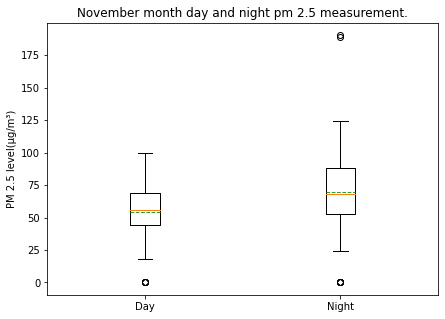

In [74]:
fig, axis = plt.subplots(1, 1, figsize=(7,5))

plt.boxplot([day,night],showmeans=True, meanline=True)
plt.ylabel("PM 2.5 level(µg/m³)")
plt.xlabel("")
plt.title("November month day and night pm 2.5 measurement.")
plt.xticks([1,2],['Day', 'Night'],)

plt.show()

### Removing Outliers from day and night observations for november month

In [75]:
def removeOutliersIQRMethod(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    
    return data[(data > LL) & (data < UL)]

In [76]:
day = removeOutliersIQRMethod(day)
night = removeOutliersIQRMethod(night)

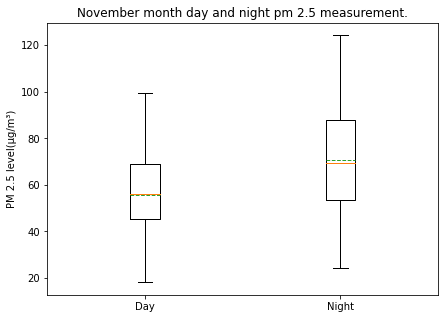

In [77]:
fig, axis = plt.subplots(1, 1, figsize=(7,5))

plt.boxplot([day,night],showmeans=True, meanline=True)
plt.ylabel("PM 2.5 level(µg/m³)")
plt.xlabel("")
plt.title("November month day and night pm 2.5 measurement.")
plt.xticks([1,2],['Day', 'Night'],)

plt.show()

### Hypothesis to check whether air quality is different during day and night in the month of November

 H0: pm2.5 means of day and night same (mu1 - mu2 = 0)<br>
 H1: pm2.5 means of day and night are different (mu1 - mu2 != 0)

In [101]:
day_mean = day.mean()
night_mean = night.mean()
n2 = len(day)
n1 = len(night)
s2 = np.var(day)
s1 = np.var(night)
z_critical = sp.norm.ppf(0.975)
print(f"Day mean {day_mean}, Night mean {night_mean}, z is {z_critical}, s1 is {s1}, s2 is {s2}, n1 is {n1} and n2 \
is {n2}")

Day mean 16.1794, Night mean 21.949333333333332, z is 1.959963984540054, s1 is 117.23661622222222, s2 is 78.33352163999999, n1 is 60 and n2 is 50


In [102]:
(night_mean - day_mean) + z_critical*(np.sqrt((s1/n1) + (s2/n2)))

9.4474724350679

In [103]:
(night_mean - day_mean) - z_critical*(np.sqrt((s1/n1) + (s2/n2)))

2.092394231598762

In [104]:
z_calculated = (night_mean - day_mean)/np.sqrt((s1/n1) + (s2/n2))
print(z_calculated)

3.0751165966383525


As z_calculated > z_critical we reject H0

In [105]:
p_value = 2*(1 - sp.norm.cdf(z_calculated))
print(p_value)

0.002104202753662854


as p_value < alpha(0.05) we reject H0


#### Conclusion - with 95% Confidence we can say that air quality at day and night are different in month of november

### 4th week of March day and night pm 2.5 level

In [83]:
march_df = pm25_df[pm25_df['month'] == '03'][['value','date','time']]

In [84]:
march_df['time'] = list(map(lambda x:x[0:2], march_df['time']))

In [85]:
march_df.dtypes

value    float64
date      object
time      object
dtype: object

In [86]:
march_df['date'] = march_df['date'].astype(int)
march_df['time'] = march_df['time'].astype(int)

In [87]:
march_df.head()

,value,date,time
6307,23.89,31,23
6308,23.24,31,23
6309,23.24,31,22
6310,23.24,31,22
6311,24.10,31,22


In [88]:
march_df_last_week = march_df[(march_df['date'] >= 25) & (march_df['date'] <= 31)][['value','time']]
march_df_last_week.head()

,value,time
6307,23.89,23
6308,23.24,23
6309,23.24,22
6310,23.24,22
6311,24.10,22


In [89]:
march_df_last_week['time'].unique()

array([23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3,  2,  1,  0])

In [90]:
day = march_df_last_week[(march_df_last_week['time'] >= 6) & (march_df_last_week['time']<=18)]['value']
night = march_df_last_week[(march_df_last_week['time'] > 18) | (march_df_last_week['time'] < 6)]['value']

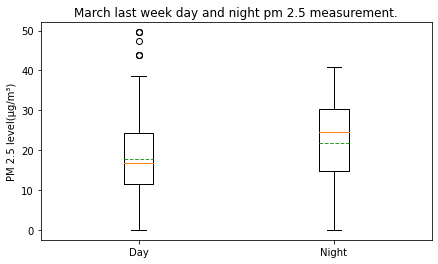

In [92]:
fig, axis = plt.subplots(1, 1, figsize=(7,4))

plt.boxplot([day,night],showmeans=True, meanline=True)
plt.ylabel("PM 2.5 level(µg/m³)")
plt.xlabel("")
plt.title("March last week day and night pm 2.5 measurement.")
plt.xticks([1,2],['Day', 'Night'],)

plt.show()

In [93]:
day = removeOutliersIQRMethod(day)
night = removeOutliersIQRMethod(night)

### Box plot after removing outliers

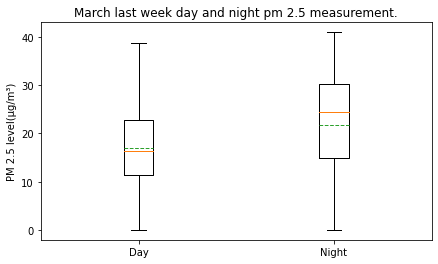

In [94]:
fig, axis = plt.subplots(1, 1, figsize=(7,4))

plt.boxplot([day,night],showmeans=True, meanline=True)
plt.ylabel("PM 2.5 level(µg/m³)")
plt.xlabel("")
plt.title("March last week day and night pm 2.5 measurement.")
plt.xticks([1,2],['Day', 'Night'],)

plt.show()

### Hypothesis to check whether there is difference in pollution level between Day and Night for last week of march 

 H0: pm2.5 means of last week fo march day and night same (mu1 - mu2 = 0) <br>
 H1: pm2.5 means of last week fo march day and night are different (mu1 - mu2 != 0) <br>
 CI = 99<br>
 Alpha = 0.01

In [95]:
day = day.sample(50)
night = night.sample(60)

day_mean = day.mean()
night_mean = night.mean()
n2 = len(day)
n1 = len(night)
s2 = np.var(day)
s1 = np.var(night)
z_critical = sp.norm.ppf(0.995)
print(f"Day mean {day_mean}, Night mean {night_mean}, z is {z_critical}, s1 is {s1}, s2 is {s2}, n1 is {n1} and n2 \
is {n2}")

Day mean 16.1794, Night mean 21.949333333333332, z is 2.5758293035489004, s1 is 117.23661622222222, s2 is 78.33352163999999, n1 is 60 and n2 is 50


In [96]:
(night_mean - day_mean) + z_critical*(np.sqrt((s1/n1) + (s2/n2)))

10.603038970944201

In [97]:
(night_mean - day_mean) - z_critical*(np.sqrt((s1/n1) + (s2/n2)))

0.9368276957224593

In [98]:
z_calculated = (night_mean - day_mean)/np.sqrt((s1/n1) + (s2/n2))
print(z_calculated)

3.0751165966383525


As z_calculated > z_critical we reject H0

In [99]:
p_value = 2*(1 - sp.norm.cdf(z_calculated))
print(p_value)

0.002104202753662854


as p_value < alpha(0.01) we reject H0

####  Conclusion - we are 99% confident that air quality at day and night are different for last week of march

# <center>--- Thank You --- </center>